In [11]:
import hashlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from skimage import metrics

In [12]:
filename = 'dog.jpg' 

with open (filename,"rb") as f:
    data = f.read()
    hash_msg = hashlib.sha256(data).hexdigest()
    print("the hash is: "+ hash_msg)
    # print(bytes)

the hash is: 102abe8c385d2c007ebd97a84645fac7905481809ba3829426f88bf046271936


In [13]:
msg = bin(int(hash_msg,16)).replace("0b","")
print(msg)

1000000101010101111101000110000111000010111010010110000000000011111101011110110010111101010000100011001000101111110101100011110010000010101001000000110000000100110111010001110000010100101000010011011111000100010111111000001000110001001110001100100110110


In [14]:
img =  cv2.imread('Lenna.png',0)
img_flat1 = img.flatten()
img_flat2=img.flatten()
# print(real_img)
# print(img_flat)

In [15]:
#encryption
for i in range(len(msg)):
    if (img_flat1[i] & 1) !=int(msg[i]):
        if int(msg[i])==0:
            img_flat1[i]-=1
        elif int(msg[i])==1:
            img_flat1[i]+=1

stego_img = np.zeros((img.shape[0],img.shape[1]),np.uint8)
stego_img = np.reshape(img_flat1,(img.shape[0],img.shape[1]))

In [16]:
#decryption
dec_msg=""
for  i in range(len(msg)):
    dec_msg = dec_msg + str(img_flat1[i] & 1)

print("The hash message is: "+ hash_msg)
decimal_msg = int(dec_msg, 2)
hex_msg = hex(decimal_msg)[2:]
print("The decrypted msg is: ",hex_msg)

diff = int(msg,2) - int(dec_msg,2)
print ("Difference between encrypted and decrypted msg  is : ",diff)

The hash message is: 102abe8c385d2c007ebd97a84645fac7905481809ba3829426f88bf046271936
The decrypted msg is:  102abe8c385d2c007ebd97a84645fac7905481809ba3829426f88bf046271936
Difference between encrypted and decrypted msg  is :  0


In [17]:
#steganalysis
mse=0

for i in range(img.shape[0]*img.shape[1]):
    mse += (img_flat2[i]-img_flat1[i])*(img_flat2[i]-img_flat1[i])
mse/=(img.shape[0]*img.shape[1])
print("MSE:",mse)

psnr = 20* math.log10(255/math.sqrt(mse))
print("PSNR:", psnr)

print("SSIM: ",metrics.structural_similarity(img,stego_img))


MSE: 0.00052642822265625
PSNR: 80.91741196418334
SSIM:  0.9999989240564244


Text(0.5, 1.0, 'Stego Image')

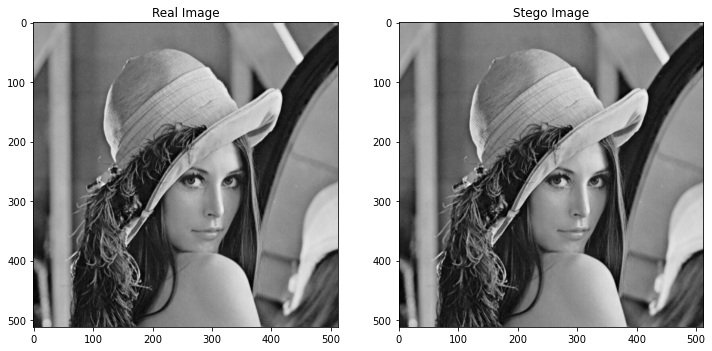

In [18]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.title("Real Image")
plt.subplot(1,2,2)
plt.imshow(stego_img,'gray')
plt.title("Stego Image")